In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- In this project, we will use an Ecommerce company based customer activity data
- The objective of the analysis is to find the impact of time spent of App or Website on the amount spent
- We will use Linear Regression to find the coefficient of the features and attribute the importance of the feature using the coefficient vallue

## Data

Load data and perform initial checks on data to understand the schema and null values 

In [2]:
customers_data = pd.read_csv('Ecommerce Customers.csv')

In [3]:
customers_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers_data.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

We can use the following features :
- 'Avg. Session Length'
- 'Time on App'
- 'Time on Website'
- 'Length of Membership'

Further, none of the columns contain any null so for preprocessing we will only require to perform feature scaling

## EDA

In [6]:
sns.set_style('whitegrid')

[]

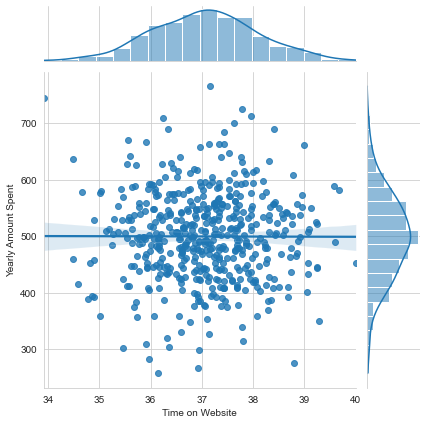

In [14]:
# More time on site, more money spent
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers_data, kind = 'reg')
plt.plot()

[]

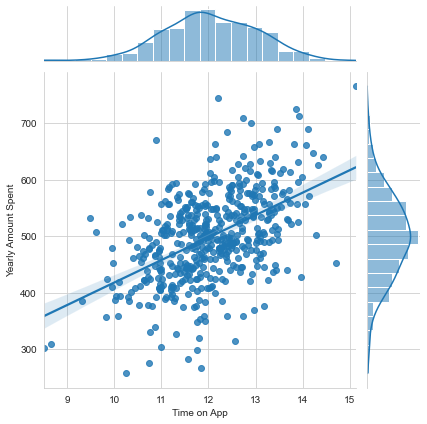

In [12]:
# More time on site, more money spent
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers_data, kind= 'reg')
plt.plot()

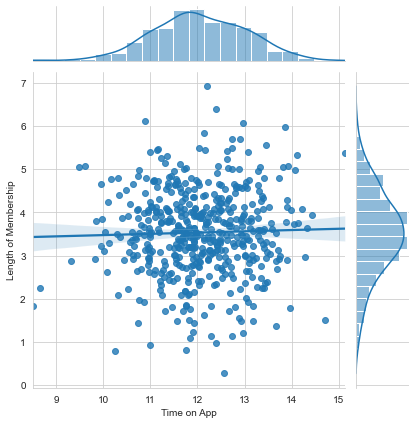

In [17]:
# Time spent of App does not have relationship with length of membership
sns.jointplot(x='Time on App',y='Length of Membership',kind='reg',data=customers_data)

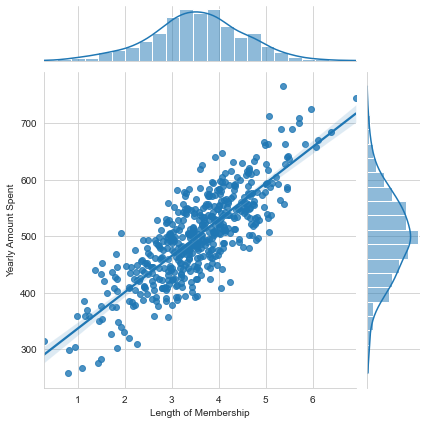

In [20]:
# length of membership is directly proportional to amount spent
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',kind='reg',data=customers_data)

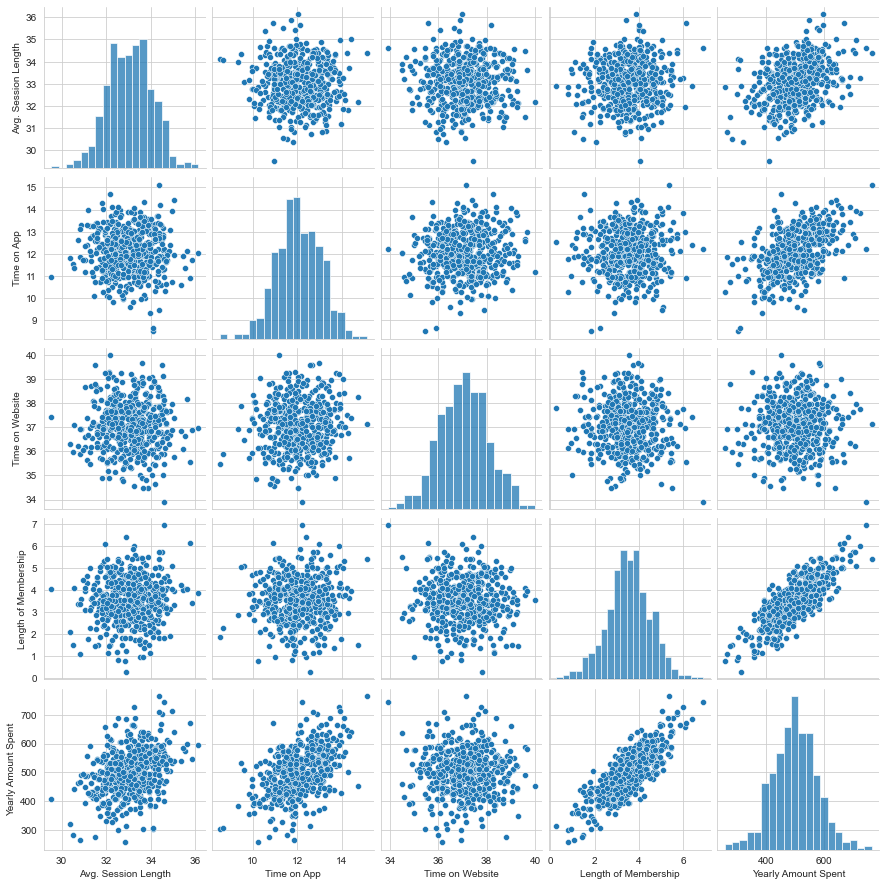

In [19]:
#pair plot for all the features
sns.pairplot(customers_data)

In [21]:
#checking correlation with amount spent
customers_data.corr()['Yearly Amount Spent']

Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

## Train & Test 

In [23]:
'''
Based on selected features, dividing the data into X & y
Further spliting the data into train & test
'''
X = customers_data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers_data['Yearly Amount Spent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 4) (350,)
(150, 4) (150,)


## Feature Scaling

In [24]:
#standard scaling the featurs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(data= scaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(data= scaler.fit_transform(X_test), columns= X_test.columns)

X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,-1.499941,-0.730834,-0.042984,0.274430
1,-1.163743,2.110040,-0.060729,0.200101
2,0.228480,-0.546783,0.048110,1.141258
3,0.846567,0.508317,0.072683,-0.887289
4,-0.004191,0.494168,0.580927,0.518859


## Model building & evaluation 

In [25]:
#import a linear model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [26.04265125 36.67425683  0.18503853 60.20236045]


Text(0, 0.5, 'Predicted Y')

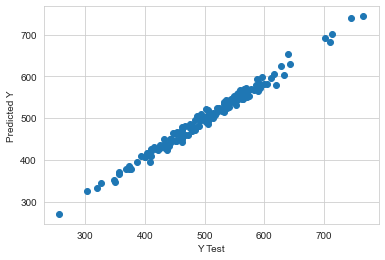

In [27]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [28]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.369764701026433
MSE: 133.2745416560086
RMSE: 11.544459348796227


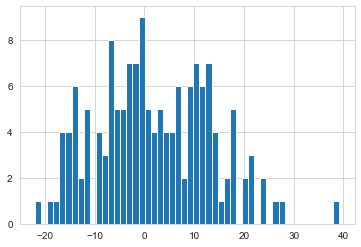

In [35]:
plt.hist((y_test-predictions),bins=50 )
plt.show()

## Conclusion 

In [38]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,26.042651
Time on App,36.674257
Time on Website,0.185039
Length of Membership,60.202360


Time spent on App have higher impact on amount spent and one unit increase in Time on App can increase the amount by 36.67 whereas one unit increase in Time on Website only increases the amount by 0.185